**Importing Important Libraries**

In [1]:
# for importing dataset
import numpy as np
import pandas as pd
    
# for performing text clustering    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# for providing the path
import os
print(os.listdir('../input/'))

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

['Text Clustering.xlsx']


**Importing the Dataset**

In [2]:
# importing the excel file
data = pd.read_excel('../input/Text Clustering.xlsx', header = None)

# converting the data  to csv format
data.to_csv('your_csv.csv', encoding='utf-8')

# reading the data in csv format
data = pd.read_csv('your_csv.csv')

# getting the shape
data.shape

(200, 2)

In [3]:
# assigning names to the columns

data.columns = ['Id', 'Text']

# checking the names of the columns
data.columns

Index(['Id', 'Text'], dtype='object')

In [4]:
# getting the length of the text as another feature

data['Length'] = data['Text'].apply(len)

In [5]:
# describing the dataset

data.groupby('Length').describe().head(20)

Id                                              
       count   mean std    min    25%    50%    75%    max
Length                                                    
648      1.0  103.0 NaN  103.0  103.0  103.0  103.0  103.0
721      1.0  154.0 NaN  154.0  154.0  154.0  154.0  154.0
742      1.0  161.0 NaN  161.0  161.0  161.0  161.0  161.0
743      1.0    6.0 NaN    6.0    6.0    6.0    6.0    6.0
758      1.0  184.0 NaN  184.0  184.0  184.0  184.0  184.0
760      1.0   77.0 NaN   77.0   77.0   77.0   77.0   77.0
765      1.0  167.0 NaN  167.0  167.0  167.0  167.0  167.0
784      1.0   64.0 NaN   64.0   64.0   64.0   64.0   64.0
786      1.0   46.0 NaN   46.0   46.0   46.0   46.0   46.0
789      1.0  194.0 NaN  194.0  194.0  194.0  194.0  194.0
791      1.0   50.0 NaN   50.0   50.0   50.0   50.0   50.0
811      1.0    5.0 NaN    5.0    5.0    5.0    5.0    5.0
815      1.0   18.0 NaN   18.0   18.0   18.0   18.0   18.0
840      1.0   30.0 NaN   30.0   30.0   30.0   30.0   30.0
856      1.0   93.0 NaN   93.0   93.0   93.0   93.0   93.0
859      1.0   28.0 NaN   28.0   28.0   28.0   28.0   28.0
875      1.0  166.0 NaN  166.0  166.0  166.0  166.0  166.0
882      1.0   14.0 NaN   14.0   14.0   14.0   14.0   14.0
892      1.0  187.0 NaN  187.0  187.0  187.0  187.0  187.0
894      1.0   42.0 NaN   42.0   42.0   42.0   42.0   42.0

In [6]:
# looking at the head of the data

data.head()

,Id,Text,Length
0,0,Claxton hunting first major medal\n\nBritish h...,1238
1,1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,902
2,2,Greene sets sights on world title\n\nMaurice G...,2045
3,3,IAAF launches fight against drugs\n\nThe IAAF ...,1125
4,4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",939


## Data Visualization

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'The Distribution of Length over the Texts')

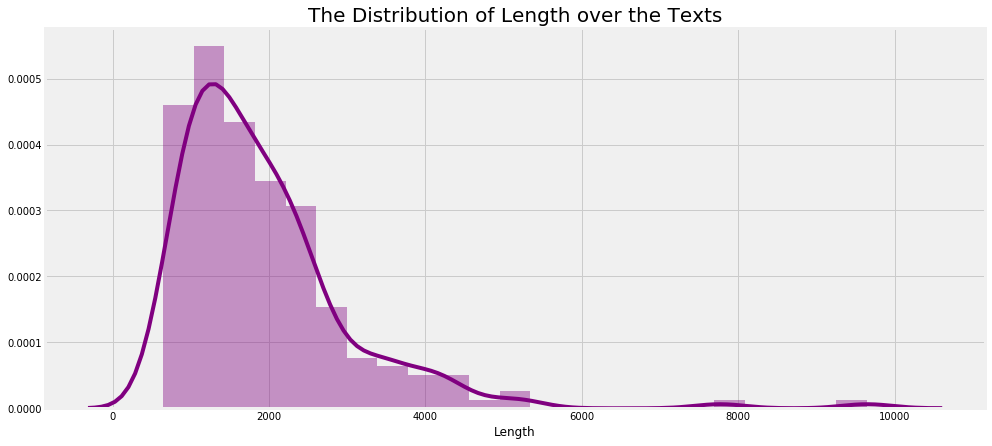

In [7]:
# looking at the distribution of length of the different texts

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(data['Length'], color = 'purple')
plt.title('The Distribution of Length over the Texts', fontsize = 20)

Text(0.5, 1.0, 'WordCloud ')

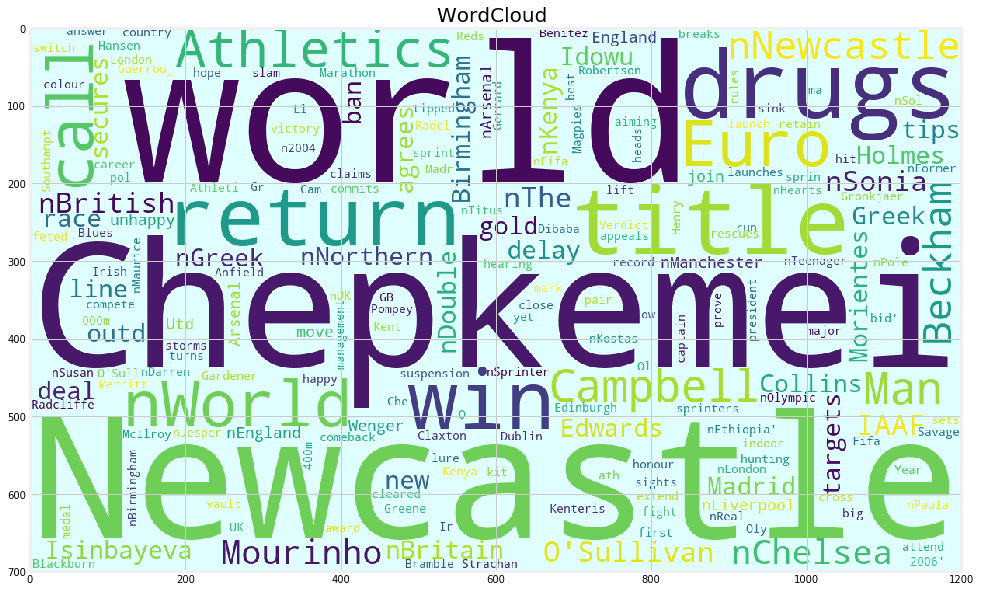

In [8]:
# wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(data['Text']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

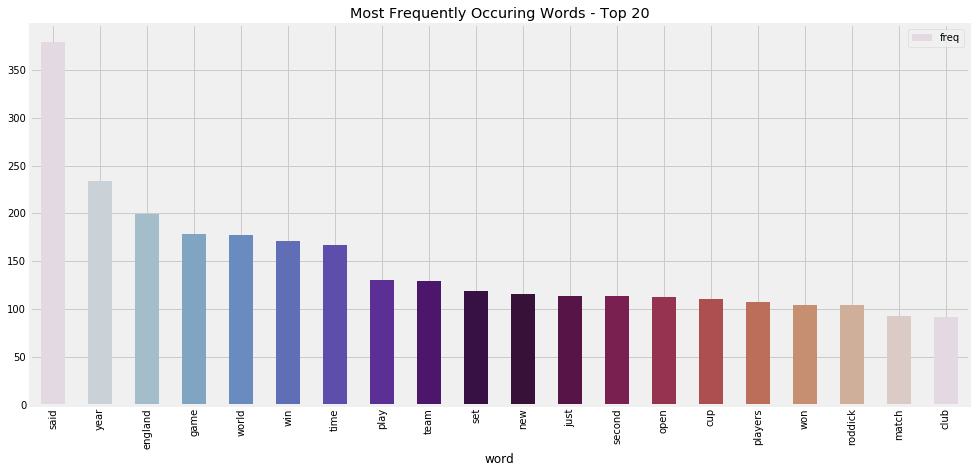

In [9]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['Text'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

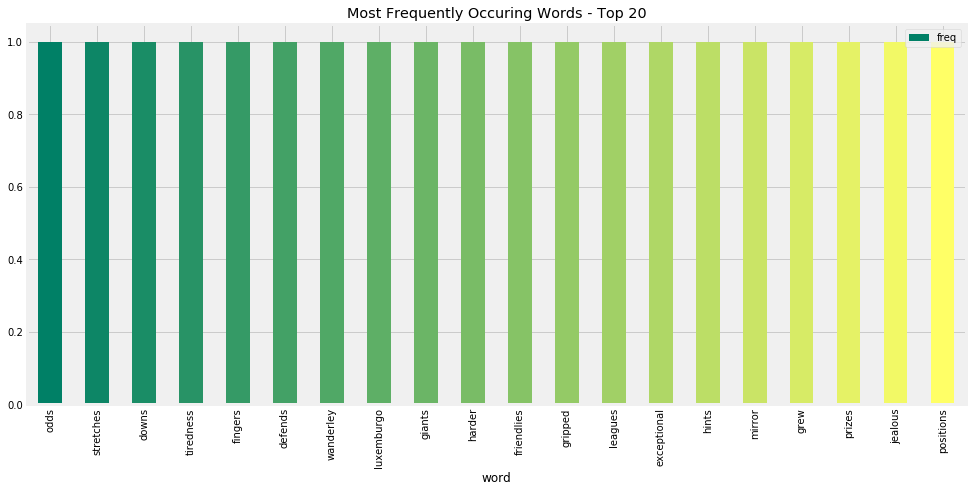

In [10]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['Text'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

## Data Preprocessing

In [11]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# cleaning the data

corpus = []

for i in range(0, 200):
    review = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
# vectorizing the data using Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features = 2000)
X = vectorizer.fit_transform(data['Text'])

# getting the shape of X
print("Shape of X :", X.shape)

Shape of X : (200, 2000)


## Clustering

In [14]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

# prediction on the Text no. 1
Y = vectorizer.transform(["Claxton hunting first major medal British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid.The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. I am quite confident, said Claxton. But I take each race as it comes. As long as I keep up my training but not do too much I think there is a chance of a medal.Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week's Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous seasons, the 25-year-old also contested the long jump but since moving from Colchester to London she has re-focused her attentions. Claxton will see if her new training regime pays dividends at the European Indoors which take place on 5-6 March"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

# Prediction on the Text no.2
Y = vectorizer.transform(["O Sullivan could run in Worlds Sonia O'Sullivan has indicated that she would like to participate in next month's World Cross Country Championships in St Etienne.Athletics Ireland have hinted that the 35-year-old Cobh runner may be included in the official line-up for the event in France on 19-20 March. Provincial teams were selected after last Saturday's Nationals in Santry and will be officially announced this week. O'Sullivan is at present preparing for the London marathon on 17 April. The participation of O'Sullivan, currentily training at her base in Australia, would boost the Ireland team who won the bronze three years agio. The first three at Santry last Saturday, Jolene Byrne, Maria McCambridge and Fionnualla Britton, are automatic selections and will most likely form part of the long-course team. OSullivan will also take part in the Bupa Great Ireland Run on 9 April in Dublin."])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Top terms per cluster:
Cluster 0:
 said
 england
 game
 cup
 open
 win
 play
 year
 club
 players
Cluster 1:
 world
 athletics
 athens
 year
 olympic
 race
 champion
 indoor
 said
 time


Prediction
Cluster number : [1]
Cluster number : [1]
